What opportunities exist for individuals to make lifestyle changes to decrease their risk of diabetes?

In [1]:
#importing libairies
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Capstone 2 Diabetes Health Indicator

In [2]:
#importing data
diabetes = pd.read_csv("diabetes_health_indicators.csv",low_memory = False)

#view of information about the diabetes
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [3]:
#view of columns
diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [78]:
#setting data
def bmi_classification(row):
    if row < 18.5:
        result = 'Underweight'
    elif row < 25:
        result = 'Healthy'
    elif row < 30:
        result = 'Slightly Overweight'
    else:
        result = 'Overweight'
    return result

diabetes['bmi_classification'] = diabetes['BMI'].apply(bmi_classification)

def diabetes_label(row):
    if row == 0:
        result = 'no diabetes'
    elif row == 1:
        result = 'prediabetes'
    elif row == 2:
        result = 'diabetes'
    else:
        result = 'n/a'
    return result

diabetes['diabetes_label'] = diabetes['Diabetes_012'].apply(diabetes_label)

def diabetes_bin(row):
    if row < 2:
        result = 0
    else:
        result = 1
    return result

diabetes['diabetes_bin'] = diabetes['Diabetes_012'].apply(diabetes_bin)

def diabetes_bin_label(row):
    if row == 0:
        result = 'Non-Diabetic'
    else:
        result = 'Diabetic'
    return result

diabetes['diabetes_bin_label'] = diabetes['diabetes_bin'].apply(diabetes_bin_label)



def age_range(row):
    if row == 1:
        result = '18 to 24'
    elif row == 2:
        result = '25 to 29'
    elif row == 3:
        result = '30 to 34'
    elif row == 4:
        result = '35 to 39'
    elif row == 5:
        result = '40 to 44'
    elif row == 6:
        result = '45 to 49'
    elif row == 7:
        result = '50 to 54'
    elif row == 8:
        result = '55 to 59'
    elif row == 9:
        result = '60 to 64'
    elif row == 10:
        result = '65 to 69'
    elif row == 11:
        result = '70 to 74'
    elif row == 12:
        result = '75 to 79'
    else:
        result = '80 or older'
    return result
        
diabetes['age_range'] = diabetes['Age'].apply(age_range)

def income_range(row):
    if row < 5:
        result = 'Less Than $10,000'
    elif row < 8:
        result = 'Less Than $35,000'
    else:
        result = '$75,000 or More'
    return result
        
diabetes['income_range'] = diabetes['Income'].apply(income_range)

def education_range(row):
    if row == 1:
        result = 'Never Attended School'
    elif row == 2:
        result = 'Elementary'
    elif row == 3:
        result = 'Junior High School'
    elif row == 4:
        result = 'Senior High School'
    elif row == 5:
        result = 'Undergraduate Degree'
    else:
        result = 'Magister'
    return result
        
diabetes['education_range'] = diabetes['Education'].apply(education_range)

def genhlth_label(row):
    if row == 1:
        result = 'Poor'
    elif row == 2:
        result = 'Fair'
    elif row == 3:
        result = 'Good'
    elif row == 4:
        result = 'Very Good'
    else:
        result = 'Excellent'
    return result
        
diabetes['genhlth_label'] = diabetes['GenHlth'].apply(genhlth_label)

def sexlabel(row):
    if row == 0:
        result = 'Female'
    elif row == 1:
        result = 'Male'
    return result

diabetes['sexlabel'] = diabetes['Sex'].apply(sexlabel)

def menhlth_range(row):
    if row < 11:
        result = 1
    elif row < 21:
        result = 2
    else:
        result = 3
    return result
diabetes['menhlth_range'] = diabetes['MentHlth'].apply(menhlth_range)

def physhlth_range(row):
    if row < 11:
        result = 1
    elif row < 21:
        result = 2
    else:
        result = 3
    return result
diabetes['physhlth_range'] = diabetes['PhysHlth'].apply(physhlth_range)

diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,diabetes_label,diabetes_bin,diabetes_bin_label,age_range,income_range,education_range,genhlth_label,sexlabel,menhlth_range,physhlth_range
0,0,1,1,1,40,1,0,0,0,0,...,no diabetes,0,Non-Diabetic,60 to 64,"Less Than $10,000",Senior High School,Excellent,Female,2,2
1,0,0,0,0,25,1,0,0,1,0,...,no diabetes,0,Non-Diabetic,50 to 54,"Less Than $10,000",Magister,Good,Female,1,1
2,0,1,1,1,28,0,0,0,0,1,...,no diabetes,0,Non-Diabetic,60 to 64,"$75,000 or More",Senior High School,Excellent,Female,3,3
3,0,1,0,1,27,0,0,0,1,1,...,no diabetes,0,Non-Diabetic,70 to 74,"Less Than $35,000",Junior High School,Fair,Female,1,1
4,0,1,1,1,24,0,0,0,1,1,...,no diabetes,0,Non-Diabetic,70 to 74,"Less Than $10,000",Undergraduate Degree,Fair,Female,1,1


In [5]:
#viewing informations
diabetes.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,diabetes_bin
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.139333
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.346294
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


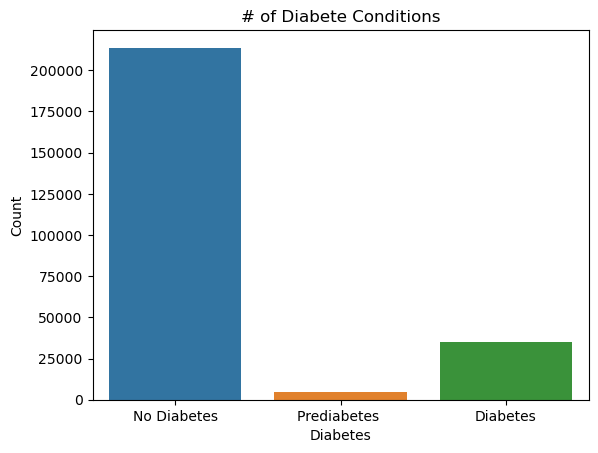

In [6]:
#bar graph of data
a = sns.countplot(x= 'Diabetes_012', data = diabetes)
a.set(xticklabels=["No Diabetes", "Prediabetes ", "Diabetes"])
a.set(xlabel = 'Diabetes')
a.set(ylabel = 'Count')
a.set(title="# of Diabete Conditions")
plt.show()

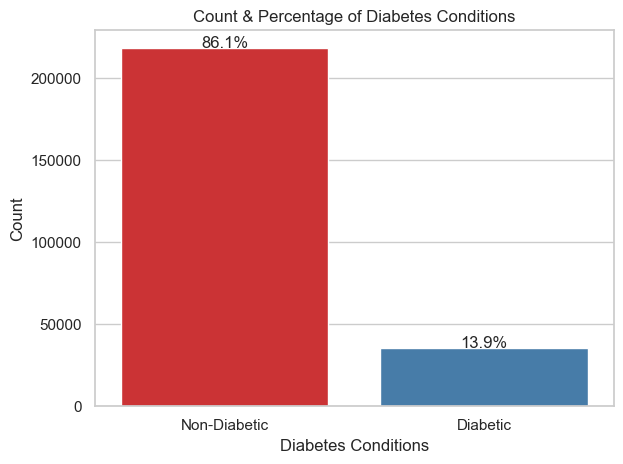

In [7]:
#bar graph of binary data for count and percentage
sns.set(style="whitegrid")
ax = sns.countplot(data =diabetes, x='diabetes_bin_label', palette='Set1')
total = len(diabetes) 
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height() + 2
    ax.annotate(percentage, (x, y), fontsize=12, ha='center')
plt.xlabel("Diabetes Conditions")
plt.ylabel("Count")
plt.title("Count & Percentage of Diabetes Conditions")
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

For making diabetic values binary, joined prediabetic to no-diabetic and there are just about 14% of dataset had diabetes.

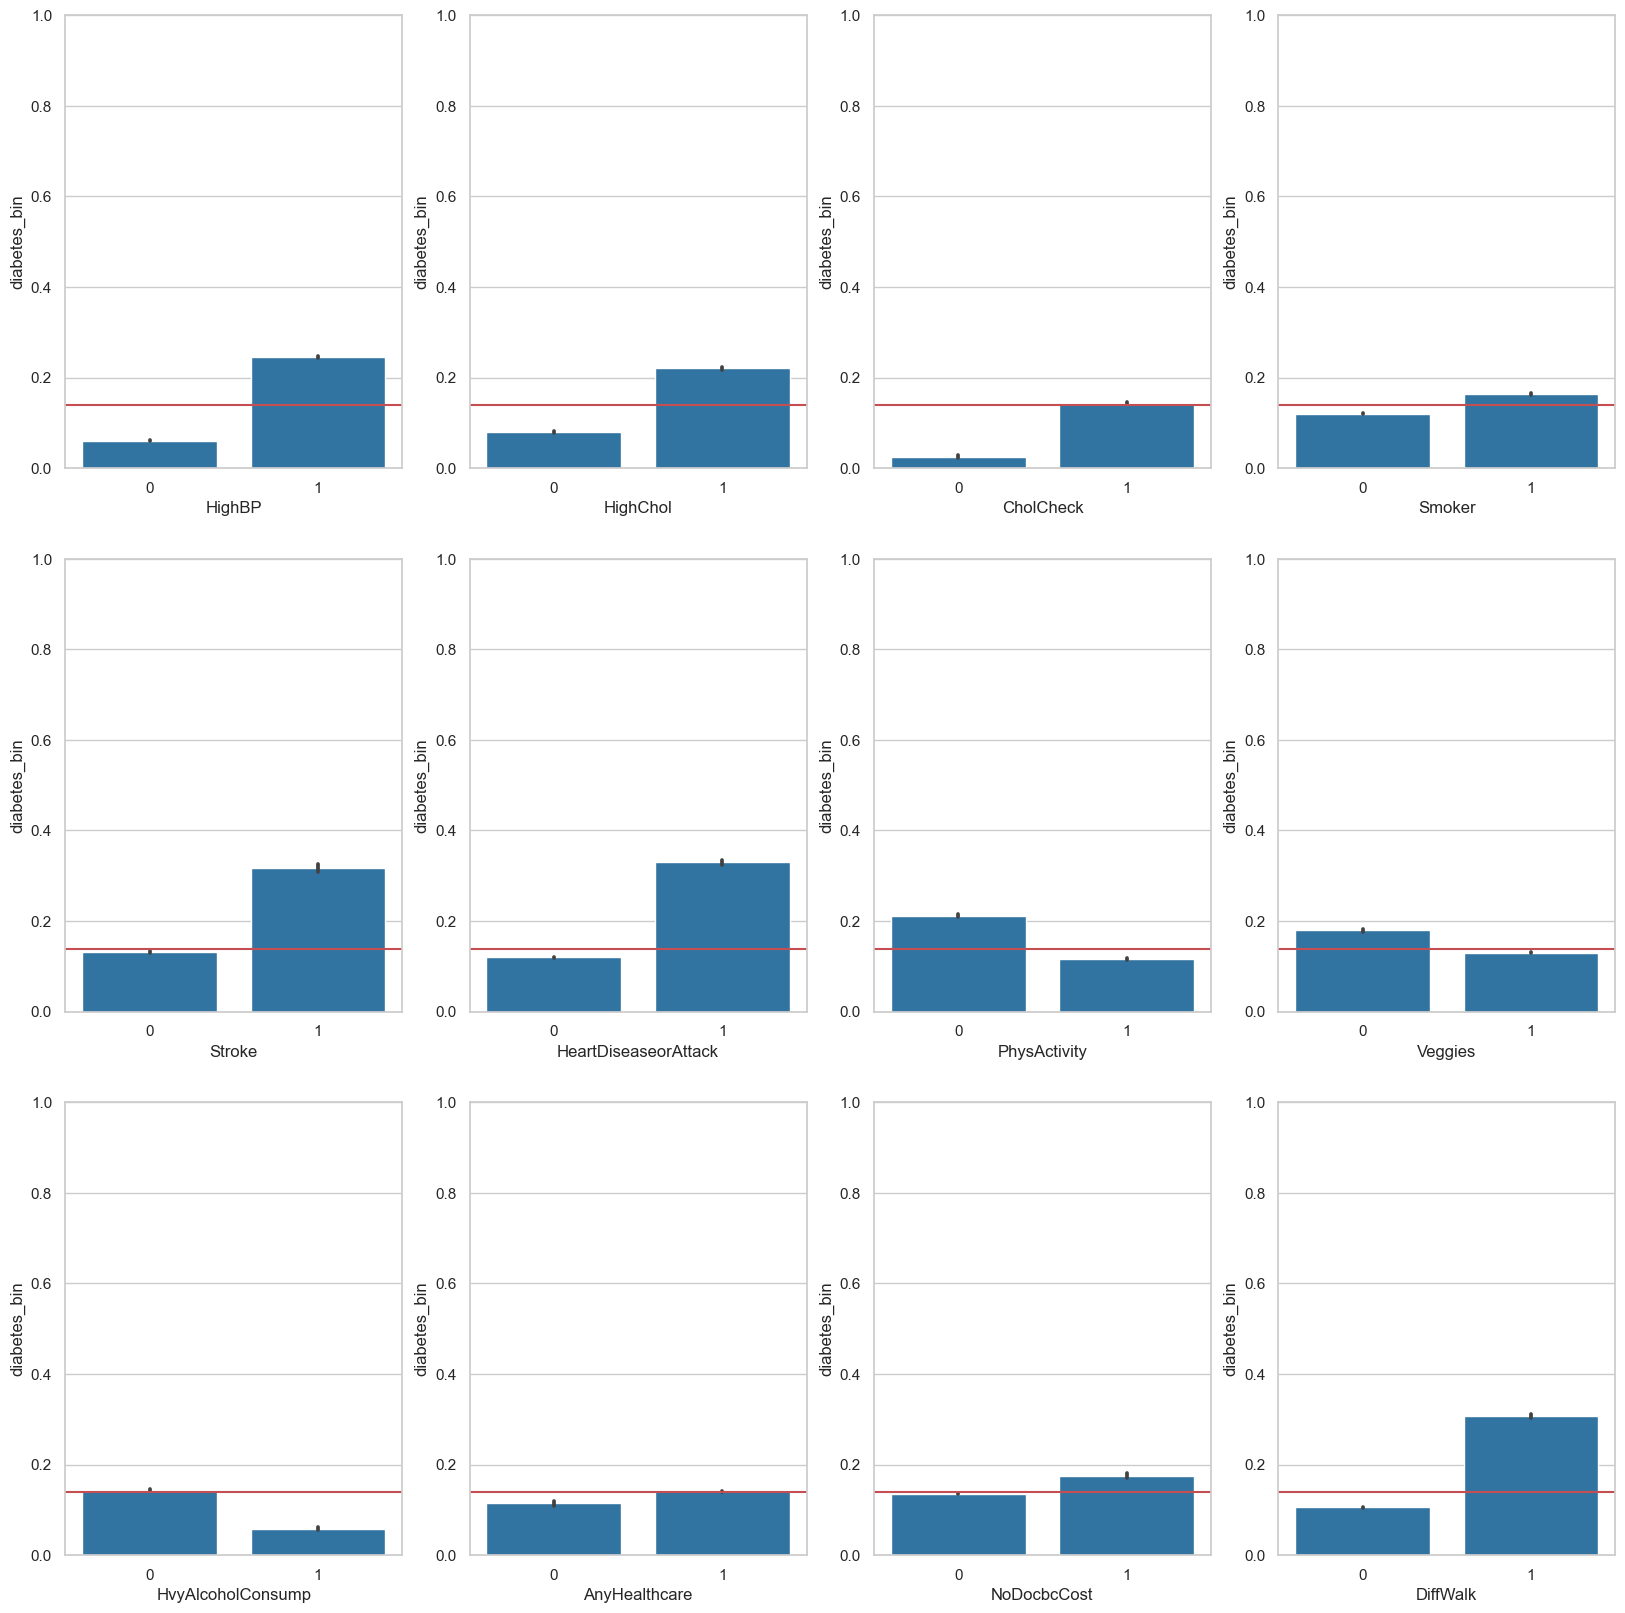

In [36]:
def diabetesbar(x, data, ax):
    sns.barplot(x=x, y='diabetes_bin', data=data, color='tab:blue', ax=ax)
    ax.axhline(data['diabetes_bin'].mean(), color='r')
    ax.set_ylim(0, 1)

fig, ax = plt.subplots(3, 4, figsize=(20, 20))

for i in range(len(yes_no)):
    diabetesbar(yes_no[i], diabetes, ax[i // 4, i % 4])

plt.show()

It is very clear to see that those with high blood pressure, high cholesterol, stroke, hearth diseasse or attack and difficulty walking have more diabetic patients than those without.

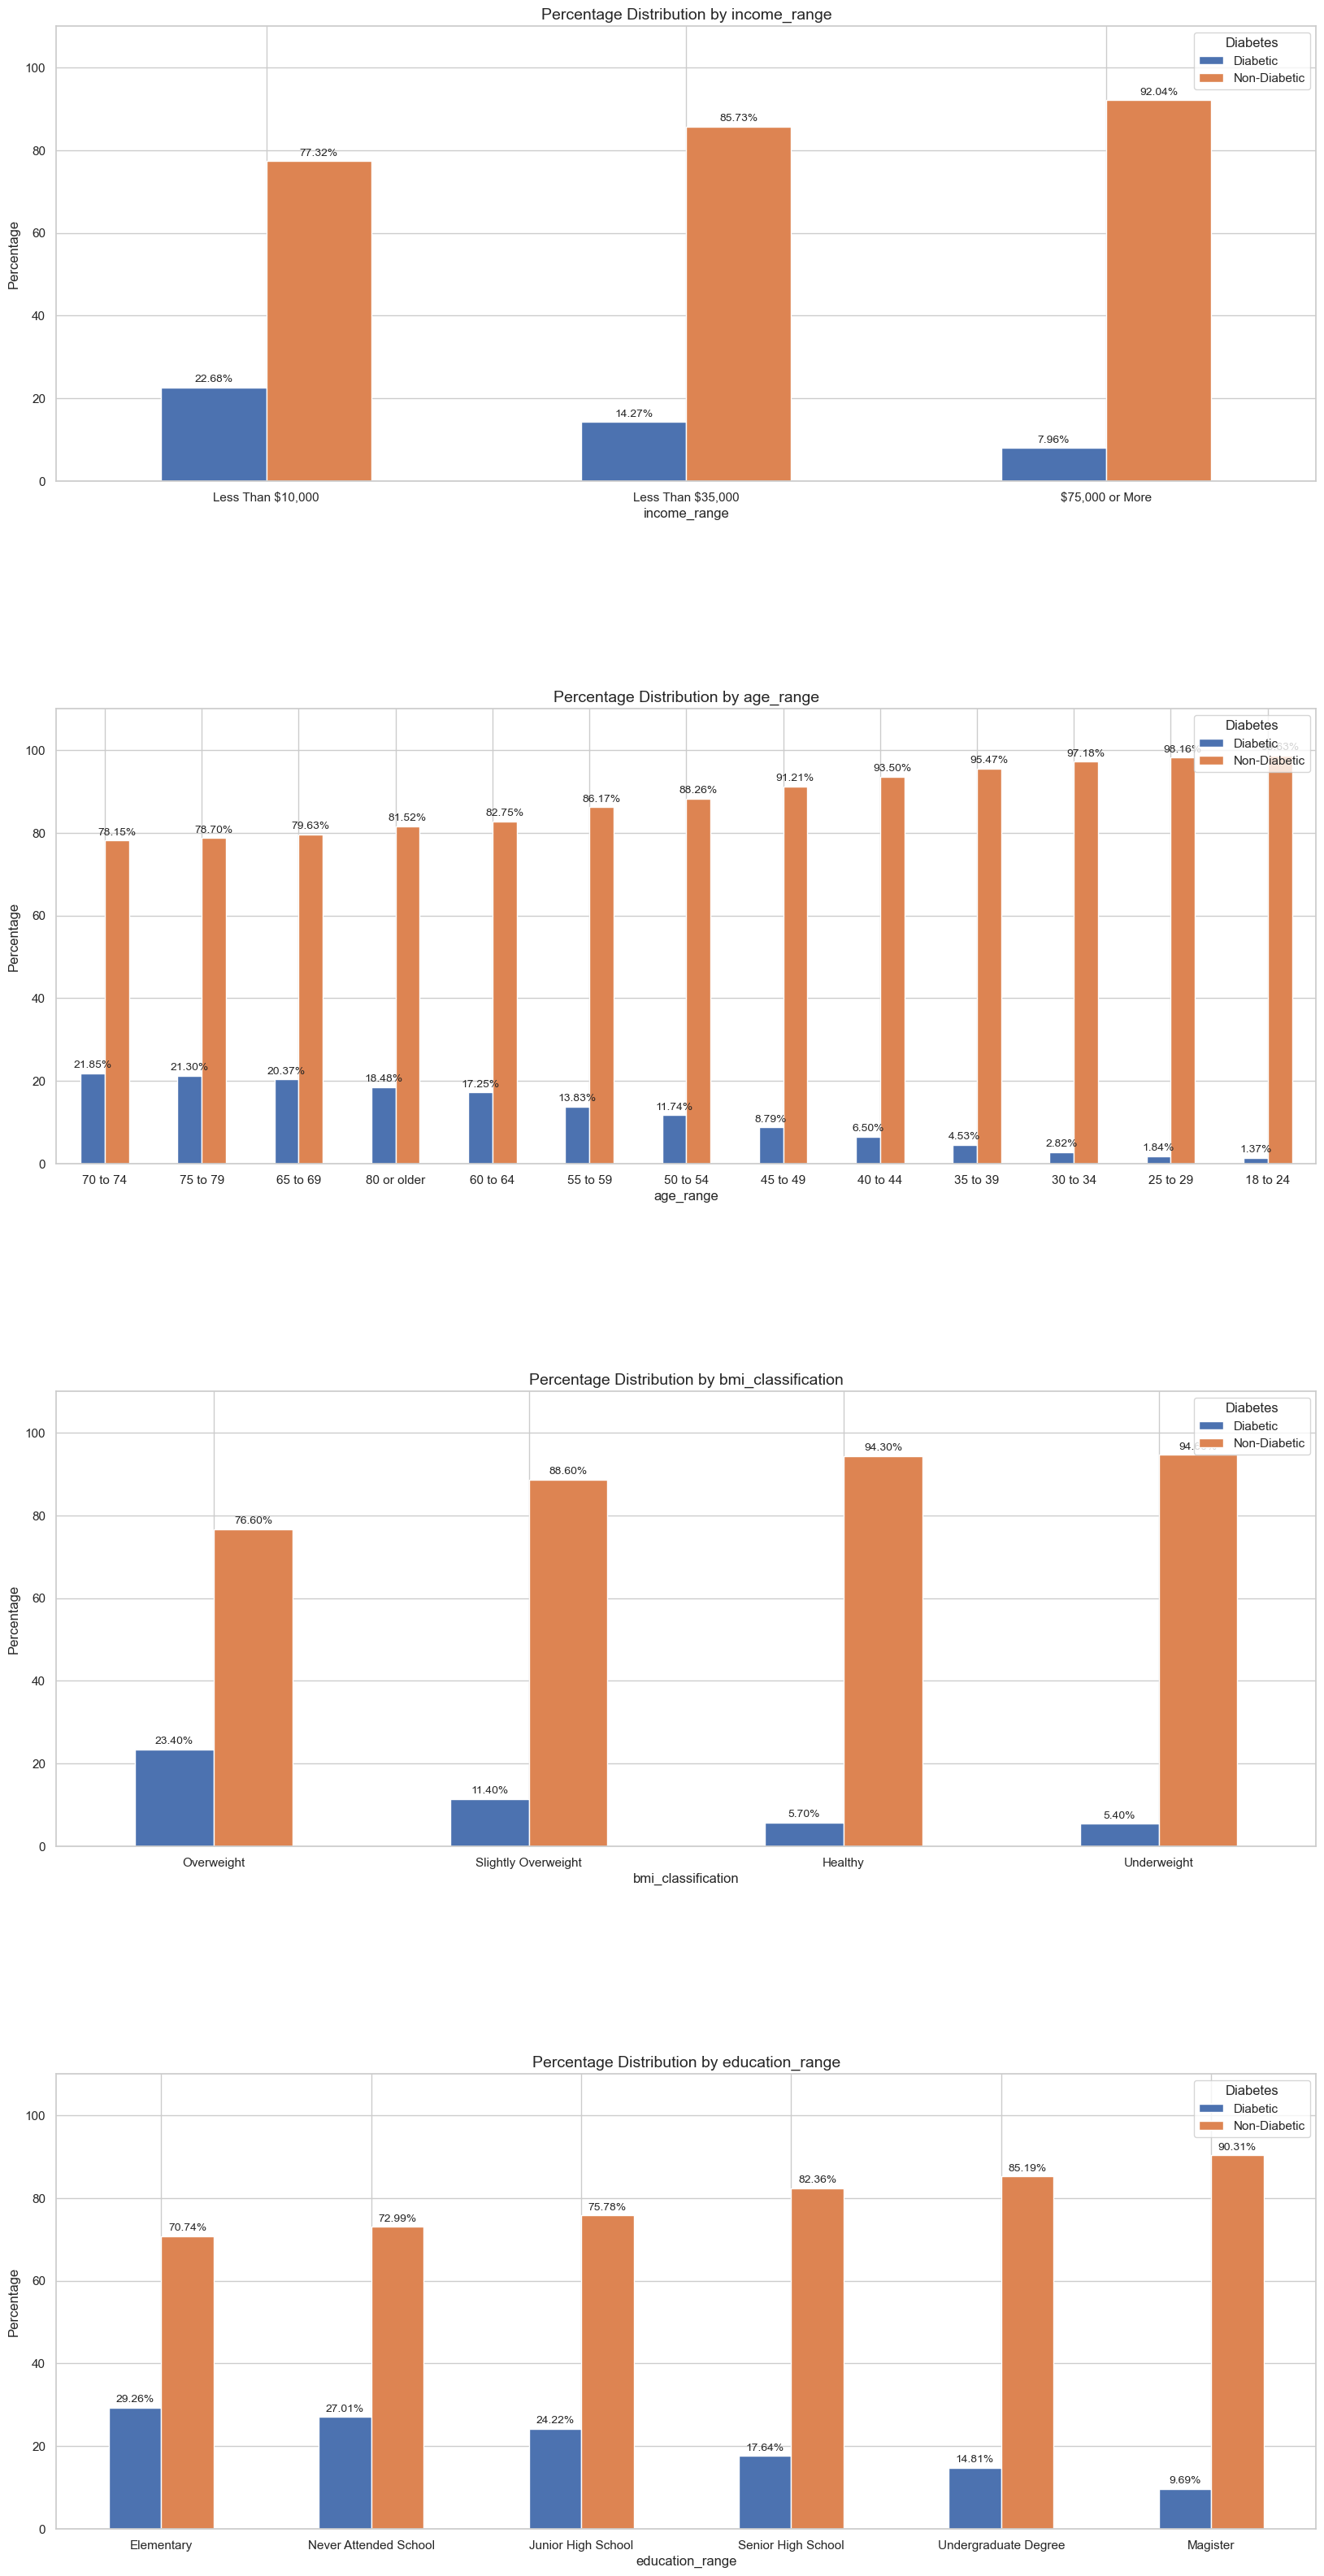

In [21]:
#using plot pivot to understand distribution of diabetes by income, age, bmi and education
other = ['income_range', 'age_range', 'bmi_classification', 'education_range']

def plotpivot (diabetes, x_column):
    _df_plot = diabetes.groupby([x_column, 'diabetes_bin_label']).size() \
        .reset_index().pivot(columns='diabetes_bin_label', index=x_column, values=0)
    
    _df_plot['Total'] = _df_plot.sum(axis=1)
    _df_plot['Diabetic (%)'] = (_df_plot['Diabetic'] / _df_plot['Total']) * 100
    _df_plot['Non-Diabetic (%)'] = (_df_plot['Non-Diabetic'] / _df_plot['Total']) * 100
    sorted_df = _df_plot.sort_values('Diabetic (%)', ascending=False)
    return sorted_df[['Diabetic (%)', 'Non-Diabetic (%)']]

fig, ax = plt.subplots(4, 1, figsize=(20, 40))
axe = ax.ravel()

c = len(other)

for i in range(c):
    sorted_data = plotpivot(diabetes, other[i])
    ax = sorted_data.plot(kind='bar', ax=axe[i])
    axe[i].set_xlabel(other[i])
    axe[i].set_ylabel('Percentage')
    axe[i].legend(title='Diabetes', loc='upper right', labels=['Diabetic', 'Non-Diabetic'])
    axe[i].set_ylim([0, 110])
    axe[i].set_title(f'Percentage Distribution by {other[i]}', fontsize=14)
    ax.set_xticklabels(sorted_data.index, rotation=0)
    
    for p in ax.patches:
        height = p.get_height()
        width = p.get_x() + p.get_width() / 2
        ax.annotate(f'{height:.2f}%', xy=(width, height), xytext=(0, 5),
                    textcoords='offset points', ha='center', fontsize=10)

plt.subplots_adjust(hspace=0.5)

plt.show()

It is clear that people with lower income, education, higher BMI and older than 59 years have more diabetes.

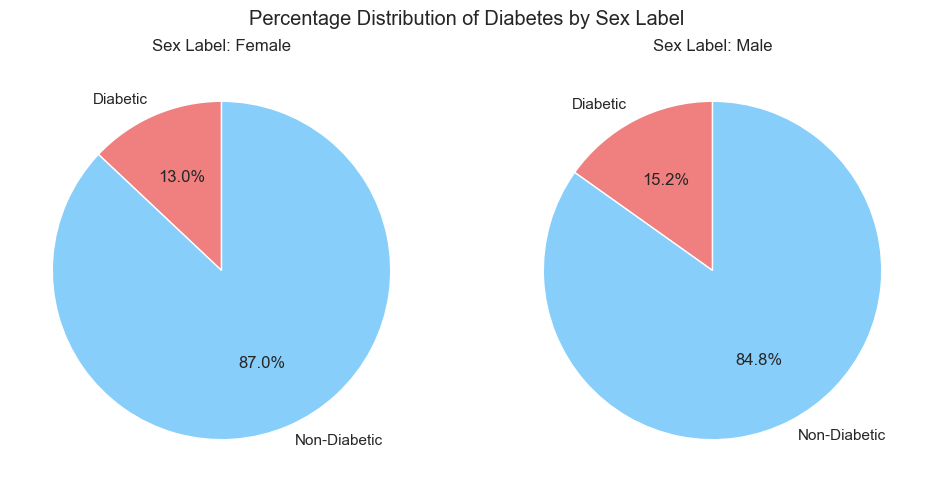

In [22]:
#using pie chart to understand distribution of diabetes by sex
percentage_data = (diabetes.groupby("sexlabel")["diabetes_bin_label"].value_counts() / diabetes.groupby("sexlabel")["diabetes_bin_label"].count()) * 100
percentage_data = percentage_data.unstack().fillna(0)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
colors = ['lightcoral', 'lightskyblue']
for i, (sexlabel, percentages) in enumerate(percentage_data.iterrows()):
    axes[i].pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f"Sex Label: {sexlabel}")
plt.suptitle("Percentage Distribution of Diabetes by Sex Label")
plt.tight_layout()
plt.show()

No significant difference in gender distribution

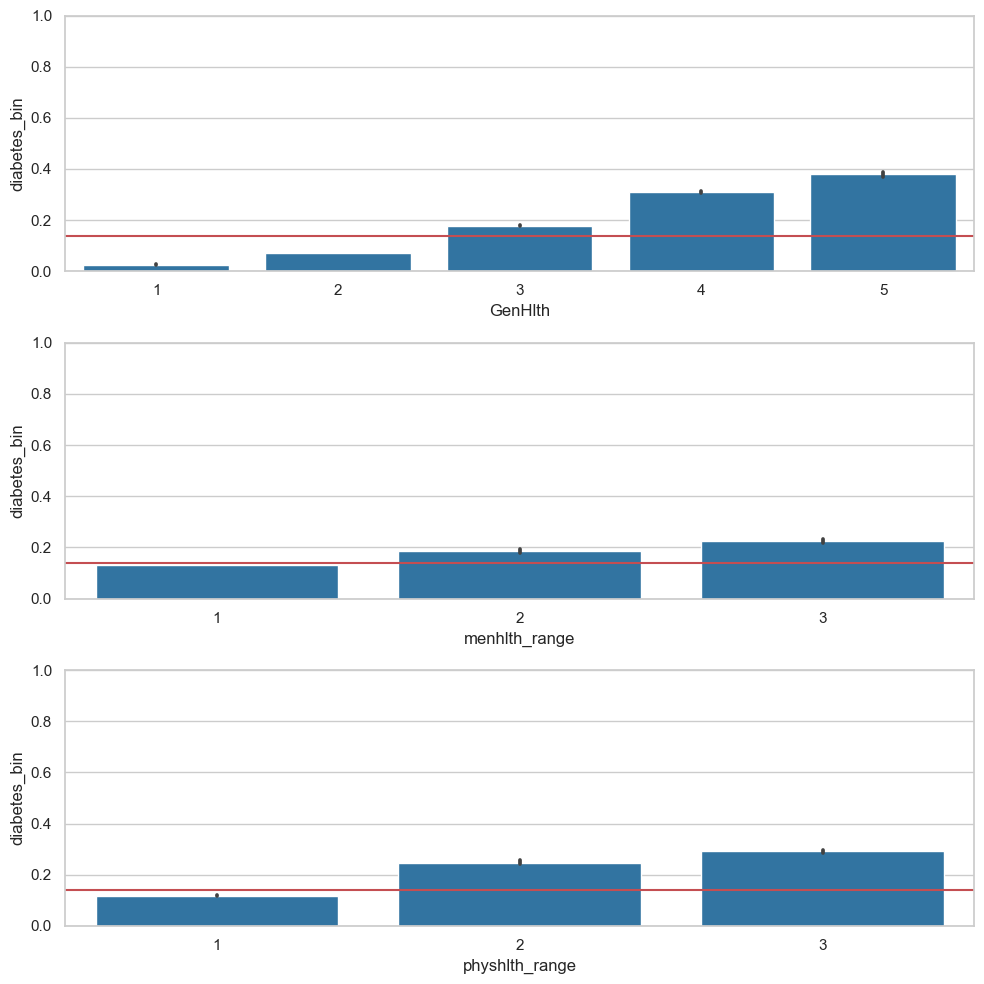

In [79]:
health = ['GenHlth', 'menhlth_range', 'physhlth_range']

def diabetesbar(x, data, ax):
    sns.barplot(x=x, y='diabetes_bin', data=data, color='tab:blue', ax=ax)
    ax.axhline(data['diabetes_bin'].mean(), color='r')
    ax.set_ylim(0, 1)

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

for i in range(len(health)):
    diabetesbar(health[i], diabetes, ax[i])

plt.tight_layout()
plt.show()

No significant difference for mental health but  who feel that their general health is not good or with physical health problems are more likely to develop diabetes.

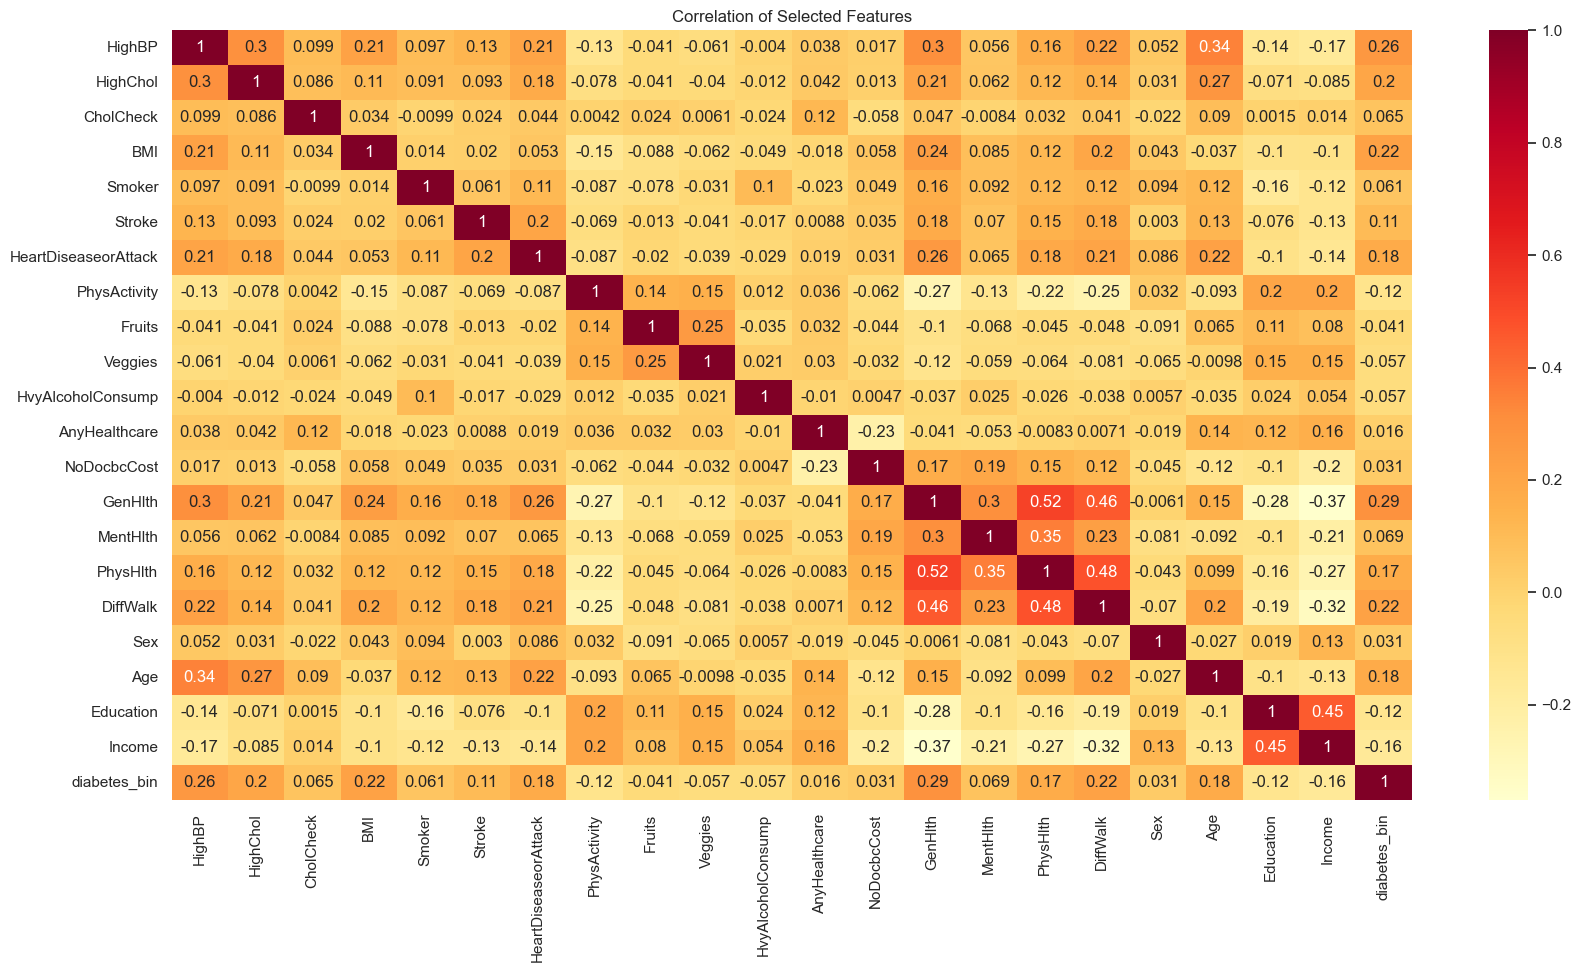

In [25]:
#using heatmap to understand correlation
df = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker','Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
 'Fruits', 'Veggies','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 
 'Sex', 'Age', 'Education', 'Income', 'diabetes_bin',]
x = diabetes[df]
matrix = x.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(matrix, annot=True, cmap='YlOrRd')
plt.title("Correlation of Selected Features")
plt.show()

Positive Relation;
(GenHlth ,PhysHlth), (PhysHlth , DiffWalk),(GenHlth ,DiffWalk)

Negative relation;
(GenHlth ,Income), (DiffWalk, Income) are highly correleted with each other

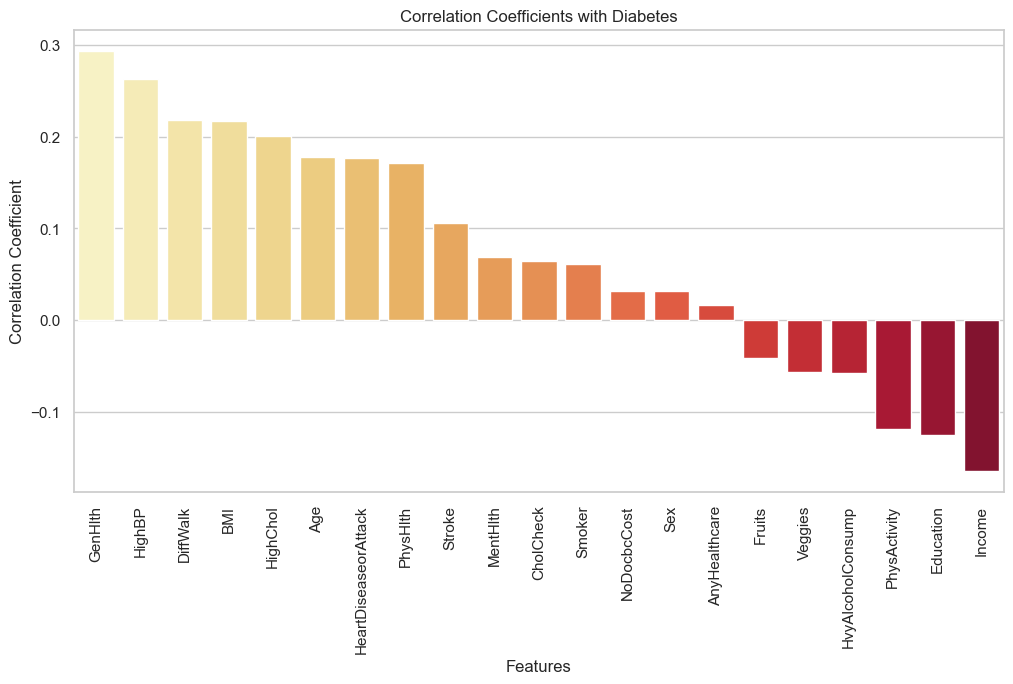

In [26]:
#using bar chart to understand correlation
selected_columns = diabetes[df]
correlation_matrix = selected_columns.corr()
correlation_coefficients = correlation_matrix['diabetes_bin'].drop('diabetes_bin')
correlation_coefficients_sorted = correlation_coefficients.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_coefficients_sorted.index, y=correlation_coefficients_sorted.values, palette='YlOrRd')
plt.title("Correlation Coefficients with Diabetes")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=90)
plt.show()

The strongest correlations appear to be with GenHlth, HighBP, DiffWalk, BMI and HighBP have correlation coefficients over 0.2 and Income, Education and PhysActivity less than -0.2 with diabetes_bin.
Fruits, AnyHealthcare, Sex and NoDocbccost least correlated with diabetes_bin.